In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# Verify dataset path
dataset_path = "/kaggle/input/clothing-identification-cnn/ModdeDataset"

# MALE DATA
jacketsM_dir = dataset_path + "/jacketsM"
jeansM_dir = dataset_path + "/jeansM"
pantsM_dir = dataset_path + "/pantsM"
shirts_dir = dataset_path + "/shirtsM"
shortsM_dir = dataset_path + "/shortsM"
suitsM_dir = dataset_path + "/suitsM"
tshirtsM_dir = dataset_path + "/tshirtsM"

# FEMALE DATA
jacketsM_dir = dataset_path + "/jacketW"
jeansW_dir = dataset_path + "/jeansW"
tshirtsW_dir = dataset_path + "/tshirtW"
suitsW_dir = dataset_path + "/suitsW"
shortsW_dir = dataset_path + "/shortsW"
pantsW_dir = dataset_path + "/pantsW"
skirts_dir = dataset_path + "/skirt"
jumpsuit_dir = dataset_path + "/jumpsuit"
croptop_dir = dataset_path + "/croptop"
blouse_dir = dataset_path + "/blouse"
saree_dir = dataset_path + "/Saree"
dress_dir = dataset_path + "/dress"
salwar_dir = dataset_path + "/salwar"

jpeg_dataset_path = "/kaggle/working/MODDE_JPEG"

# Checking if path exists
if os.path.exists(dataset_path):
    print("Directory exists!")
    print("Contents:", os.listdir(dataset_path))
else:
    print("Directory does not exist.")

# Function to convert images to JPEG format
def convert_images_to_jpeg(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for root, _, files in os.walk(src_dir):
        for file in files:
            src_file_path = os.path.join(root, file)
            dest_file_path = os.path.join(dest_dir, os.path.relpath(root, src_dir), file)
            dest_file_dir = os.path.dirname(dest_file_path)

            if not os.path.exists(dest_file_dir):
                os.makedirs(dest_file_dir)

            file_extension = os.path.splitext(file)[1].lower()

            # Skip if the file already exists in the destination directory
            if os.path.exists(dest_file_path):
                print(f"File {dest_file_path} already exists, skipping...")
                continue

            try:
                with Image.open(src_file_path) as img:
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    dest_file_path = os.path.splitext(dest_file_path)[0] + '.jpg'
                    img.save(dest_file_path, 'JPEG')
            except Exception as e:
                print(f"Failed to process {src_file_path}: {e}")

# Convert images to JPEG format
convert_images_to_jpeg(dataset_path, jpeg_dataset_path)


Directory exists!
Contents: ['dress', 'tshirtW', 'pantsM', 'jumpsuit', 'salwar', 'shortsM', 'Saree', 'croptop', 'jacketW', 'jacketsM', 'suitsW', 'jeansM', 'jeansW', 'tshirtsM', 'shortsW', 'shirtsM', 'blouse', 'skirt', 'suitsM', 'pantsW']
File /kaggle/working/MODDE_JPEG/pantsM/pants (13).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/pantsM/pants (11).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/pantsM/pants (4).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/pantsM/pants (17).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/pantsM/pants (12).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/pantsM/pants (10).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/pantsM/pants (15).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/salwar/salwar (36).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/salwar/salwar (1).jpg already exists, skipping...
File /kaggle/working/MOD

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (47).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (167).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (185).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (168).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (159).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (76).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (101).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (191).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (40).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (4).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (7).jpg already exists, skipping...
File /kaggle/working/MODDE_JPEG/tshirtsM/thsirts (

Found 19064 files belonging to 20 classes.
Using 15252 files for training.
Found 19064 files belonging to 20 classes.
Using 3812 files for validation.
Class names: ['Saree', 'blouse', 'croptop', 'dress', 'jacketW', 'jacketsM', 'jeansM', 'jeansW', 'jumpsuit', 'pantsM', 'pantsW', 'salwar', 'shirtsM', 'shortsM', 'shortsW', 'skirt', 'suitsM', 'suitsW', 'tshirtW', 'tshirtsM']


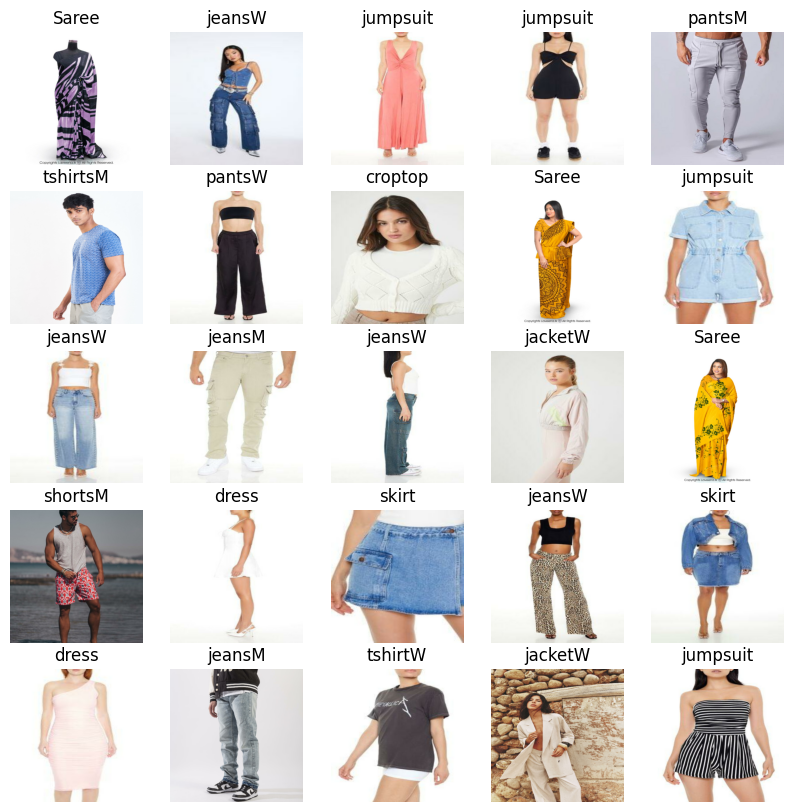

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 510, 510, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 255, 255, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 251, 251, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 251, 251, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 500000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │    16,000,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,014,292 (61.09 MB)

 Trainable params: 16,014,132 (61.09 MB)

 Non-trainable params: 160 (640.00 B)

Model compiled successfully.
Epoch 1/4
239/239 ━━━━━━━━━━━━━━━━━━━━ 4721s 20s/step - accuracy: 0.1334 - loss: 6.3166 - val_accuracy: 0.0816 - val_loss: 20.9296
Epoch 2/4
239/239 ━━━━━━━━━━━━━━━━━━━━ 4735s 20s/step - accuracy: 0.3071 - loss: 3.8938 - val_accuracy: 0.0803 - val_loss: 9.7611
Epoch 3/4
239/239 ━━━━━━━━━━━━━━━━━━━━ 4738s 20s/step - accuracy: 0.3465 - loss: 3.8553 - val_accuracy: 0.0942 - val_loss: 7.8441
Epoch 4/4
239/239 ━━━━━━━━━━━━━━━━━━━━ 4738s 20s/step - accuracy: 0.3599 - loss: 4.3842 - val_accuracy: 0.1186 - val_loss: 6.3044
60/60 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.1117 - loss: 6.3175
Validation accuracy: 0.12
Validation loss: 6.30


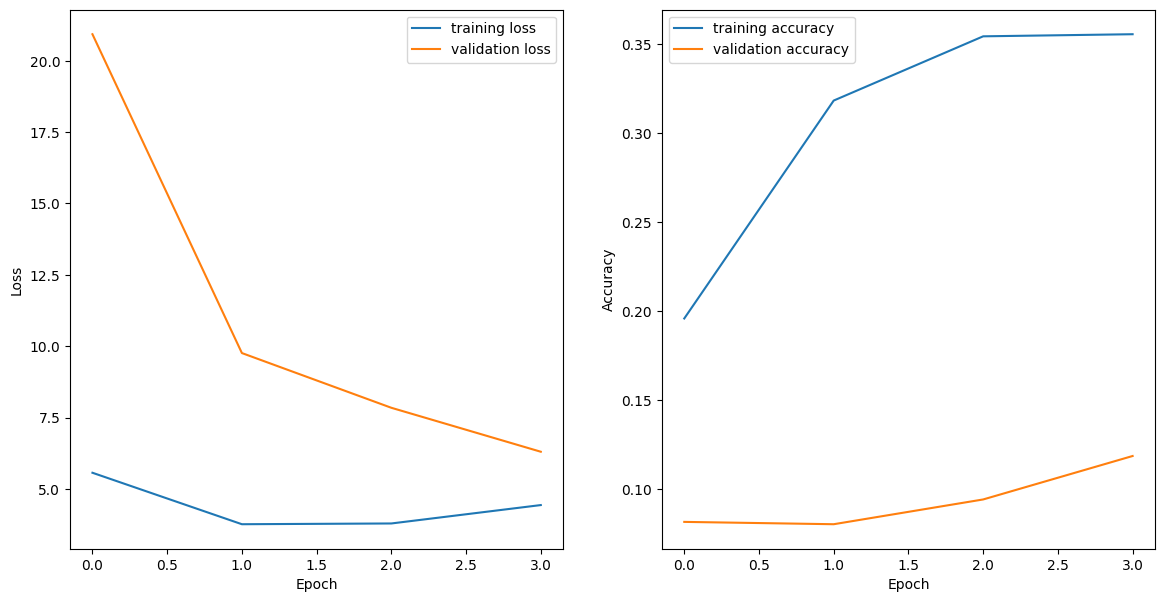

In [2]:

from tensorflow.keras import regularizers



# Load training and validation datasets
batch_size = 64
img_size = (512, 512)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    jpeg_dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    jpeg_dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)



# Check the class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Apply normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    #tf.keras.layers.RandomZoom(height_factor=(-0.2, -0.3), width_factor=(-0.2, -0.3)),
    #tf.keras.layers.RandomContrast(factor=0.1),
    #tf.keras.layers.GaussianNoise(0.1),  # Adds Gaussian noise to the input
    #tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

# Display first 9 images from the normalized & augmented dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
        1
plt.show()



# Define the CNN architecture
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([  
        
        # First block: shallow features
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        # Second block: deeper features with varying kernel size
        tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
     
       # Third block: even deeper with dilated convolution for capturing more context
    #   tf.keras.layers.Conv2D(128, (3, 3), activation='relu', dilation_rate=(2, 2)),
     #   tf.keras.layers.BatchNormalization(),
      #  tf.keras.layers.MaxPooling2D((2, 2)),
       # tf.keras.layers.Dropout(0.4),"""

        # Fourth block: wide features with larger kernel size
    #   tf.keras.layers.Conv2D(256, (7, 7), activation='relu'),
     #   tf.keras.layers.BatchNormalization(),
      #  tf.keras.layers.MaxPooling2D((2, 2)),
       # tf.keras.layers.Dropout(0.4),"""
        
        # Flatten and dense layers for classification
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),# High Dropout applied to the dense layer to increase validation accuracy and reduce chance of overfitting
        

        tf.keras.layers.Dense(num_classes, activation='softmax')
        
    ])
    model.summary()
    return model

input_shape = (512, 512, 3)
num_classes = len(class_names)

cnn_model = create_cnn_model(input_shape, num_classes)


# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print a message indicating the model is compiled
print("Model compiled successfully.")

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

"""Implement learning rate scheduler
learn_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                       factor=0.5, 
                                                       patience=2, 
                                                       verbose=1,
                                                       min_lr=0.00005)""" 
# Apply data augmentation during training
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Train the model
history = cnn_model.fit(train_ds,
                        validation_data=val_ds,
                        epochs=4,# <-- CHANGE THE number of epochs here to tune to avoid OVERFITTING 
                        callbacks=[early_stopping])

# Evaluate the model
val_loss, val_accuracy = cnn_model.evaluate(val_ds)
print(f'Validation accuracy: {val_accuracy:.2f}')
print(f'Validation loss: {val_loss:.2f}')


# Visualize training history
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the model
cnn_model.save('/kaggle/working/cnn_model.keras')

# Load model
loaded_model = tf.keras.models.load_model('/kaggle/working/cnn_model.keras')

In [3]:
# Save the model
cnn_model.save('/kaggle/working/cnn_model.keras')

# Load model
loaded_model = tf.keras.models.load_model('/kaggle/working/cnn_model.keras')